# Análisis Cluster

In [1]:
import os as os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
data = pd.read_csv("../Datasets/inv_mercados.csv", sep=',')
data.head()

,ID,V1,V2,V3,V4,V5,V6
0,1,6,4,7,3,2,3
1,2,2,3,1,4,5,4
2,3,7,2,6,4,1,3
3,4,4,6,4,5,3,6
4,5,1,3,2,2,6,4


In [3]:
data.dtypes

ID    int64
V1    int64
V2    int64
V3    int64
V4    int64
V5    int64
V6    int64
dtype: object

In [4]:
data_X = data.drop(columns=['ID'])
data_X.head()

,V1,V2,V3,V4,V5,V6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4


In [5]:
data_X_scale = pd.DataFrame(StandardScaler().fit_transform(data_X))
data_X_scale.columns = ["V1","V2","V3","V4","V5","V6"]
data_X_scale.head()

,V1,V2,V3,V4,V5,V6
0,1.161314,-0.072739,1.554929,-0.743311,-0.844581,-0.925548
1,-0.999270,-0.800132,-1.503948,-0.067574,0.902828,-0.239957
2,1.701460,-1.527525,1.045116,-0.067574,-1.427050,-0.925548
3,0.081022,1.382047,0.025491,0.608164,-0.262111,1.131225
4,-1.539416,-0.800132,-0.994135,-1.419048,1.485297,-0.239957


In [13]:
kmeans = KMeans(n_clusters=3, n_init="auto").fit(data_X_scale)
kmeans

KMeans(n_clusters=3, n_init='auto')

In [7]:
labels = pd.DataFrame(kmeans.predict(data_X_scale))
labels.columns = ['segmento']
data_final = pd.concat([data,labels], axis = 1)
data_final

,ID,V1,V2,V3,V4,V5,V6,segmento
0,1,6,4,7,3,2,3,0
1,2,2,3,1,4,5,4,1
2,3,7,2,6,4,1,3,0
3,4,4,6,4,5,3,6,2
4,5,1,3,2,2,6,4,1
5,6,6,4,6,3,3,4,0
6,7,5,3,6,3,3,4,0
7,8,7,3,7,4,1,4,0
8,9,2,4,3,3,6,3,1
9,10,3,5,3,6,4,6,2


In [8]:
data_final.groupby(['segmento'])[['V1','V2','V3','V4','V5','V6']].agg(['count','mean'])

V1              V2              V3              V4           V5  \
         count      mean count      mean count      mean count   mean count   
segmento                                                                      
0            8  5.750000     8  3.625000     8  6.000000     8  3.125     8   
1            6  1.666667     6  3.000000     6  1.833333     6  3.500     6   
2            6  3.500000     6  5.833333     6  3.333333     6  6.000     6   

                   V6            
           mean count      mean  
segmento                         
0         1.875     8  3.875000  
1         5.500     6  3.333333  
2         3.500     6  6.000000

In [9]:
sample_silhouette_values = silhouette_samples(data_X, labels)
sample_silhouette_values

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.61936515, 0.55116095, 0.55305902, 0.48546787, 0.59314503,
       0.57426923, 0.55305466, 0.57540659, 0.53538333, 0.51845135,
       0.63929909, 0.42312356, 0.39817884, 0.60553311, 0.39414773,
       0.57070211, 0.45077846, 0.1779728 , 0.53945679, 0.56363111])

In [10]:
silhouette_avg = silhouette_score(data_X, labels)
silhouette_avg

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5160793381862094

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


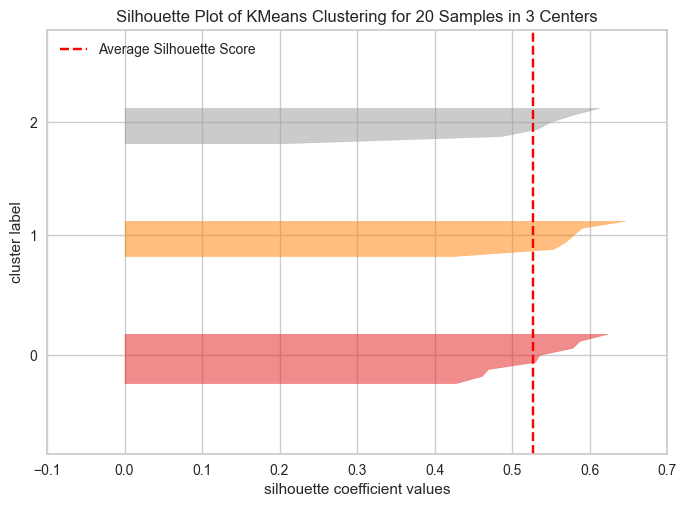

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
model = SilhouetteVisualizer(KMeans(n_clusters=3).fit(data_X_scale))
model.fit(data_X_scale)
model.show()

In [12]:
X_new = pd.DataFrame([[1,7,2,5,6,5]])
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
